In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('surveillance_data_2020.csv')
data.head()

,paragraph,subparagraph,description,BW,BY,BE,BB,HB,HH,HE,...,NI,NW,RP,SL,SN,ST,SH,TH,GBA,overall
0,3,3,"Anzahl der Verfahren, in denen im Berichtsjahr...",579,1278,333,90,35,198,698,...,417,291,237,47,223,117,331,115,78,5222
1,4,4.1,Erstanordnungen,1621,3216,1087,193,122,802,2397,...,1009,980,334,66,513,299,798,226,628,14601
2,4,4.2,Verlängerungsanordnungen,249,460,271,74,21,147,710,...,224,234,96,25,91,43,188,45,209,3130
3,5,5.1,im richterlichen Beschluss angeordnet,0,0,0,0,0,0,1,...,4,14,0,1,0,0,0,4,1,25
4,5,5.2,Tatsächlich durchgeführt,0,0,0,0,0,0,1,...,1,9,0,0,0,0,0,0,3,14


I note that the first rows of data belong to a seperate category. There e.g is specified if the surveillance has been started this year, or if it has been prolonged. Therfore I propose to split the data.

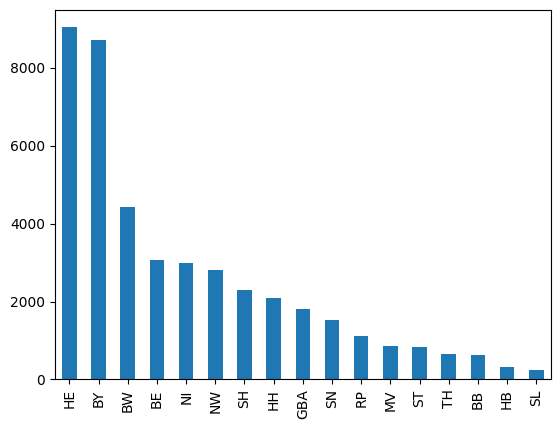

In [2]:
reasons  = data[3:]

# create a row that stores the sum all crimes
sum_row = data.sum(numeric_only=True)
sum_df = pd.DataFrame(data=sum_row).T
sum_df = sum_df.reindex(columns=data.columns)

# Drop unnecessary columns
sum_df = sum_df.drop(['paragraph', 'subparagraph', 'description', 'overall'], axis=1)

# Sort the values in descending order
sum_df_sorted = sum_df.T.sort_values(by=0, ascending=False).T

# Plotting
sum_df_sorted.iloc[-1].plot(kind='bar')
plt.show()
#ToDo: 
# barplot the reasons for surveillance
#publish the notebook to jupyter colab, so that we can work together.

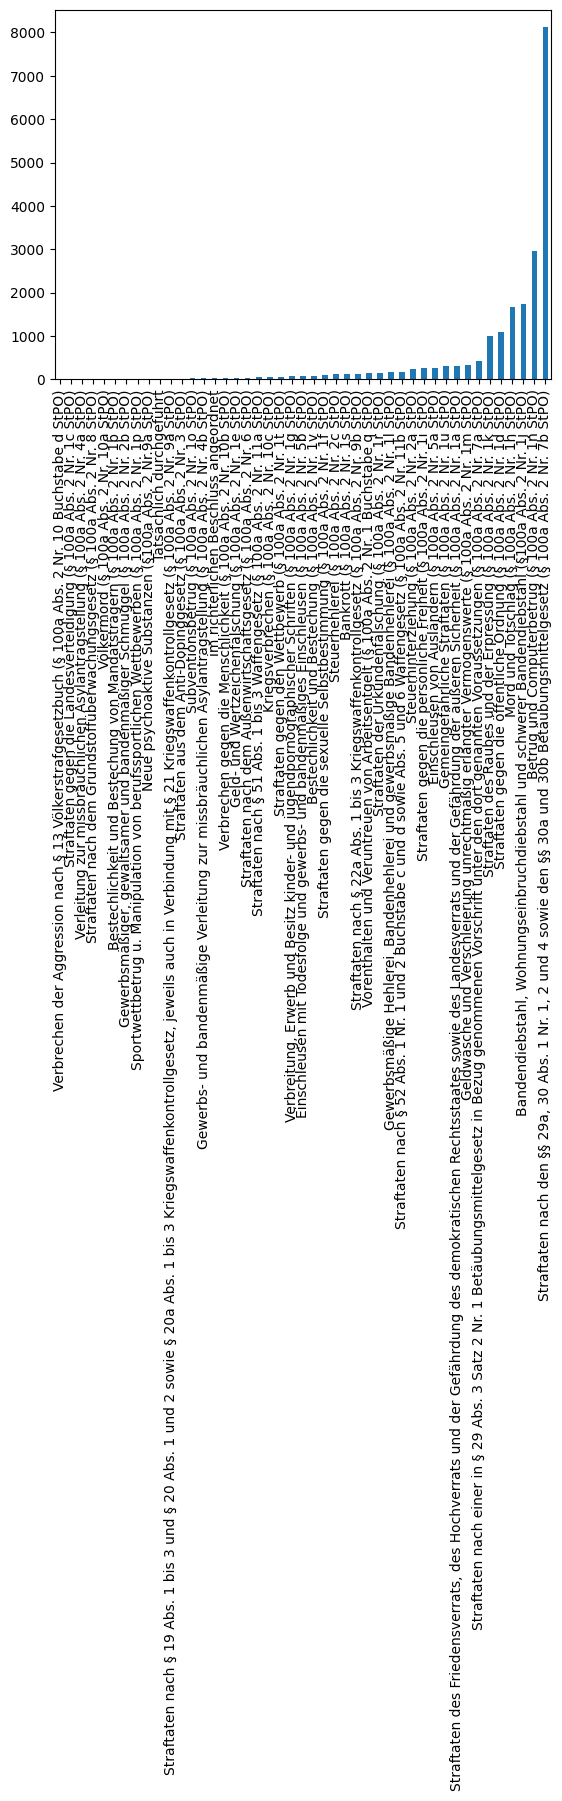

In [3]:
# Assuming data is your DataFrame and 'description' is the column you want to use as labels
data_sorted = reasons.sort_values(by=reasons.columns[-1], ascending=True)

data_sorted.iloc[:, -1].plot(kind='bar')
plt.xticks(range(len(data_sorted)), data_sorted['description'])
plt.show()

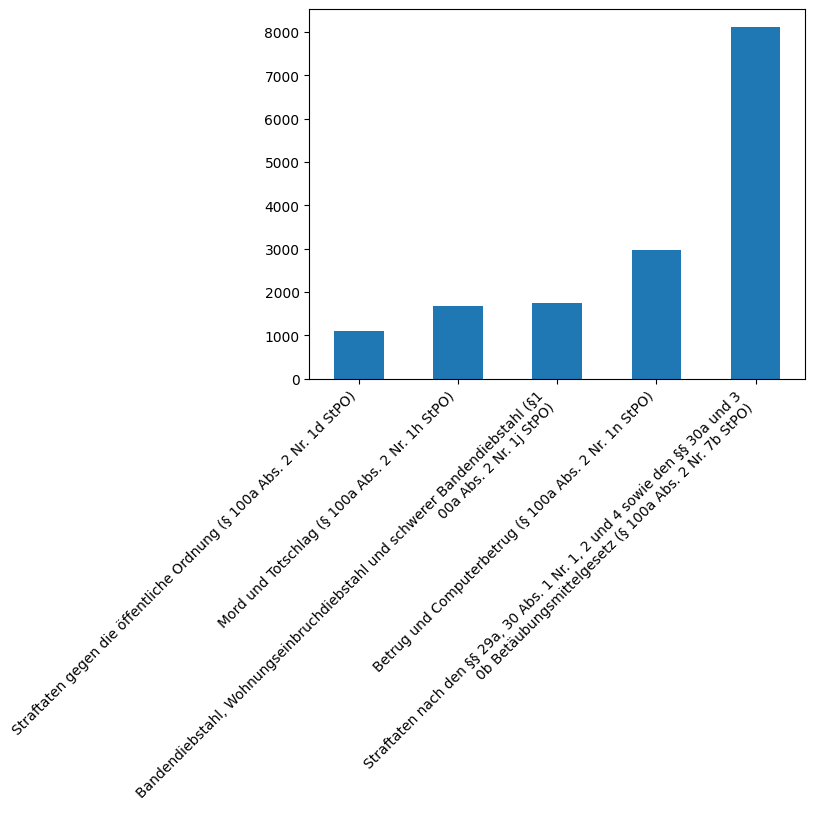

In [4]:
# Select top 5
data_sorted_top5 = data_sorted.iloc[-5:, :]

# labeling the bars
car_per_line = 75
labels = [label[:car_per_line] + '\n' + label[car_per_line:] if len(label) > car_per_line else label for label in data_sorted_top5['description']]

data_sorted_top5.iloc[:, -1].plot(kind='bar')
plt.xticks(range(len(data_sorted_top5)), labels, rotation=45, ha='right')
plt.show()

# The full dataset

In [5]:
# Assuming 'surveillance_data.xlsx' is your Excel file
xls = pd.ExcelFile('surveillance_data.xlsx')

# Get the names of all sheets in the Excel file
sheet_names = xls.sheet_names

# Read each sheet into a separate DataFrame and store them in a list
dfs = [pd.read_excel(xls, sheet_name) for sheet_name in sheet_names]

# Add a 'Year' column to each DataFrame
for i in range(len(dfs)):
    dfs[i]['Year'] = sheet_names[i]

#Fromatting
data['Year'] = data['Year'].str.replace('_surveillance', '')
data['Year'] = pd.to_datetime(data['Year'], format='%Y')


# Concatenate all DataFrames into one
data = pd.concat(dfs, ignore_index=True)

In [6]:
data.head()

,paragraph,subparagraph,description,description_en,BW,BY,BE,BB,HB,HH,...,NW,RP,SL,SN,ST,SH,TH,GBA,overall,Year
0,3,3.1,§ 100a Abs. 1 StPO,§ 100a paragraph 1 StPO,564,1203,302,81,24,205,...,274,270,44,243,129,294,81,53,5174,2021_surveillance
1,4,4.1,Erstanordnungen,Initial orders,1483,3243,1044,163,113,629,...,848,332,62,417,279,776,174,517,13977,2021_surveillance
2,4,4.2,Verlängerungsanordnungen,Extension Orders,346,629,253,44,16,141,...,192,106,25,67,88,134,68,183,3248,2021_surveillance
3,5,5.1,im richterlichen Beschlussangeordnet,ordered in a court order,2,0,4,0,0,5,...,20,0,0,0,0,0,1,1,35,2021_surveillance
4,5,5.2,Tatsächlich durchgeführt,Actually done,1,0,3,0,0,0,...,16,0,0,0,0,0,0,1,23,2021_surveillance
